# Price elasticity

## Data

<Axes: xlabel='Quantity', ylabel='Price'>

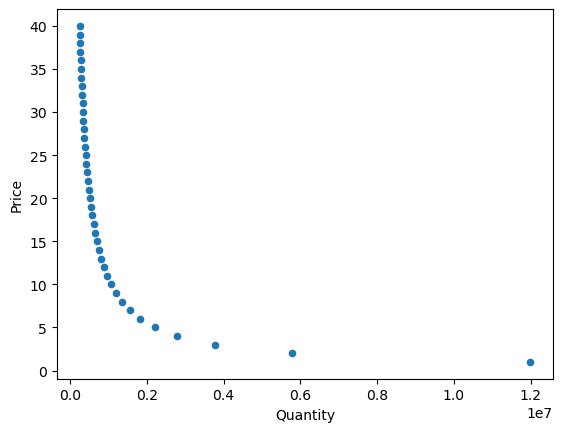

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./Data/price_data.csv')
df.head(5)
df.plot(x="Quantity", y="Price",kind="scatter")

# Modelling: Linear Price Elasticity



\begin{aligned}
Linear\ Demand\ Function\ Q  & = a + b * P \\
Linear\ Elasticity\ E  & =  \%\mathit{\Delta} Q / \%\mathit{\Delta} P \\
 & = \mathit{\Delta}Q \div Q / \mathit{\Delta}P \div P \\
 & = \dfrac{\mathit{\Delta}Q} {\mathit{\Delta}P} * \dfrac{P}  {Q} (use\ the\ mean\ as\ the\ initial\ price) \\
\end{aligned}





\begin{gather*}


\end{gather*}

In [23]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

x_value = df['Price']
y_value = df['Quantity']
X = add_constant(x_value)
model = sm.OLS(y_value, X)
result = model.fit()
    
print(result.summary())

rsquared = result.rsquared
coefficient_pvalue = result.f_pvalue
intercept,slope = result.params
median_price = np.median(df['Price'])
median_quantity = np.median(df['Quantity'])
tintercept, t_score = result.tvalues
count = x_value.count()

#Linear Price elasticity Formula
price_elasticity = round((slope)*(median_price/median_quantity),2)


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     20.36
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           6.01e-05
Time:                        11:38:11   Log-Likelihood:                -629.26
No. Observations:                  40   AIC:                             1263.
Df Residuals:                      38   BIC:                             1266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.324e+06   5.43e+05      6.118      0.0

In [40]:
print('Linear Price Elasticity {} with pvalue {}'.format(price_elasticity, coefficient_pvalue))

Linear Price Elasticity -1.05 with pvalue 3.2279624317911415e-236


# Modelling: Non-linear Price Elasticity

\begin{aligned}
Non-Linear\ Demand\ Function\ Q  & = \dfrac{a} {P^ {b}}  \\(Q)  & = a *  P^ {-b} \\
 log(Q) & =  log(a) - b *log(P)\\
 \dfrac{1}{Q} *\mathit{\Delta}Q& =  \dfrac{-b} {P}* \mathit{\Delta}P\ (take\ total\ differential)\ \\
Non-Linear Elasticity\ E  & =  \dfrac{\mathit{\Delta}Q}  {\mathit{\Delta} P }* \dfrac{P} {Q} = -b \\

\end{aligned}


In [41]:
import numpy as np

x_value = np.log(df['Price'])
y_value = np.log(df['Quantity'])
X = add_constant(x_value)
model = sm.OLS(y_value, X)
result = model.fit()
    
    
print(result.summary())

rsquared = result.rsquared
coefficient_pvalue = result.f_pvalue
intercept,slope = result.params
median_price = np.median(df['Price'])
median_quantity = np.median(df['Quantity'])
tintercept, t_score = result.tvalues
count = x_value.count()

#Non_linear Price elasticity Formula
price_elasticity = round((slope),2)


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.456e+13
Date:                Fri, 28 Apr 2023   Prob (F-statistic):          3.23e-236
Time:                        12:19:04   Log-Likelihood:                 515.83
No. Observations:                  40   AIC:                            -1028.
Df Residuals:                      38   BIC:                            -1024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3003    3.3e-07   4.94e+07      0.0

In [42]:
print('Non_linear Price Elasticity  {} with pvalue {}'.format(price_elasticity, coefficient_pvalue))

Non_linear Price Elasticity  -1.05 with pvalue 3.2279624317911415e-236


In [53]:
import math

round(math.exp(16.3003),0)

11998594.0

## Price Elasticity Chart

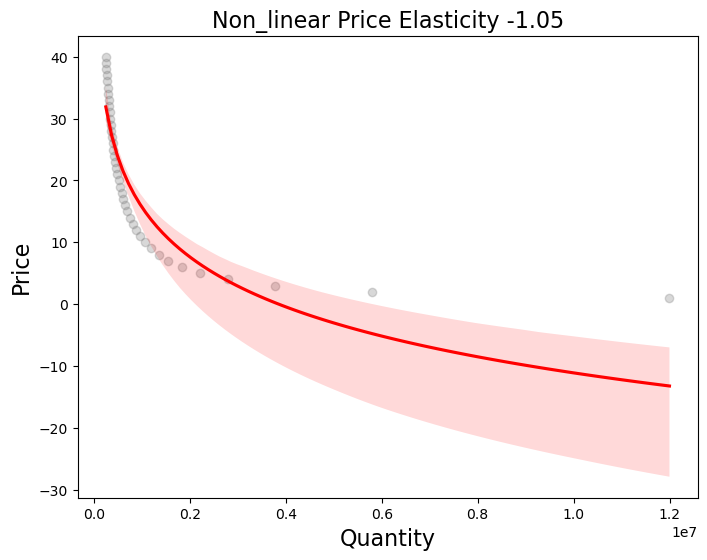

In [33]:

#Price elasticity plot
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Quantity", y="Price", logx=True,scatter_kws={"color": "Grey" ,'alpha':0.3}, line_kws={"color": "red"})
plt.ylabel('Price', fontsize=16)
plt.xlabel('Quantity', fontsize=16)
plt.title('Non_linear Price Elasticity {}'.format(non_linear_price_elasticity), fontsize=16)
plt.show()

In [81]:
import numpy as np

# Define a function to calculate total revenue
def revenue(price, demand):
    return price * demand

# Define a function to calculate demand based on price elasticity
def demand(price, elasticity):
    return 11998594 * price ** (elasticity)

# Set price elasticity range
elasticity = -1.05

# Set price range
price = list(np.linspace(1, 100, num=100))
demand = 11998594 * np.power(price,elasticity)
revenue = price  * demand
max_revenue = np.max(revenue)
max_index = np.argmax(revenue)
price[max_index]

1.0

In [93]:
data = {'Price': price, 'Revenue': revenue, 'Demand': demand}

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)

<Axes: xlabel='Demand'>

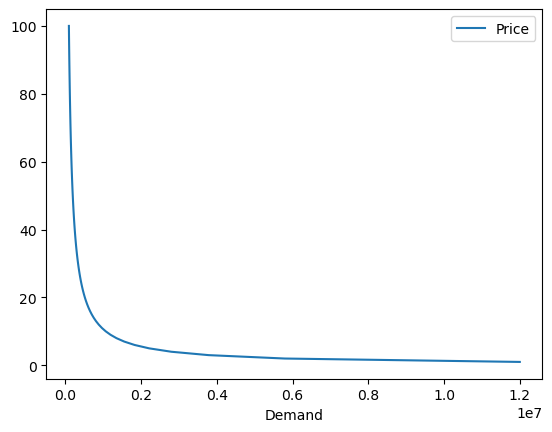

In [94]:
df.plot(kind='line', y='Price', x="Demand")

<Axes: xlabel='Price'>

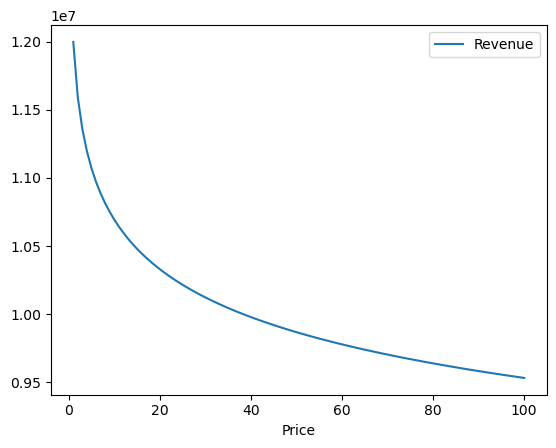

In [89]:
df.plot(kind='line', y='Revenue', x="Price")